In [1]:
# result comparison between deployments, encounters

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
result_path  = '/home/ys587/__Data/__whistle/__whistle_30_species/__fit_result_species/__final'

In [4]:
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
num_species = len(species_dict)
species_list = list(species_dict.keys())
species_id = list(species_dict.values())

# Deployment split

In [5]:
# deployment: e.g. STAR2006_test_results.npz
deployment_list = ['STAR2000', 'STAR2003', 'STAR2006', 'HICEAS2002', 'PICEAS2005']

# for ii in range(len(deployment_list)):
label_test_all  = []
label_pred_all = []
for ee in deployment_list:
    label_temp = np.load(os.path.join(result_path, '20210520_155025_deployment', ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

In [6]:
np.argmax(label_pred_all, axis=1).shape

(20074,)

In [7]:
print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None2, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

          BD      0.079     0.073     0.076      2160
          CD      0.437     0.357     0.393      4715
         STR      0.316     0.334     0.324      2691
         SPT      0.369     0.293     0.327      2392
        SPIN      0.244     0.154     0.189      1123
         PLT      0.276     0.516     0.360      2164
          RT      0.334     0.363     0.348      1404
         FKW      0.581     0.547     0.564      3425

    accuracy                          0.354     20074
   macro avg      0.330     0.330     0.323     20074
weighted avg      0.363     0.354     0.353     20074



## Confusion matrix

In [8]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [9]:
print("Confusion matrix:")
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[ 157  611  272  284  284  381  116   55]
 [ 494 1681  998  238   20  852  231  201]
 [ 400  415  898  390   74  315   68  131]
 [ 357  419  382  701  103  298   55   77]
 [ 226  188  140  192  173  111   56   37]
 [ 236  206   52   50   22 1116   77  405]
 [  78  140   32   22   21  153  510  448]
 [  38  183   72   21   12  812  412 1875]]

[[0.07 0.28 0.13 0.13 0.13 0.18 0.05 0.03]
 [0.1  0.36 0.21 0.05 0.   0.18 0.05 0.04]
 [0.15 0.15 0.33 0.14 0.03 0.12 0.03 0.05]
 [0.15 0.18 0.16 0.29 0.04 0.12 0.02 0.03]
 [0.2  0.17 0.12 0.17 0.15 0.1  0.05 0.03]
 [0.11 0.1  0.02 0.02 0.01 0.52 0.04 0.19]
 [0.06 0.1  0.02 0.02 0.01 0.11 0.36 0.32]
 [0.01 0.05 0.02 0.01 0.   0.24 0.12 0.55]]


In [10]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

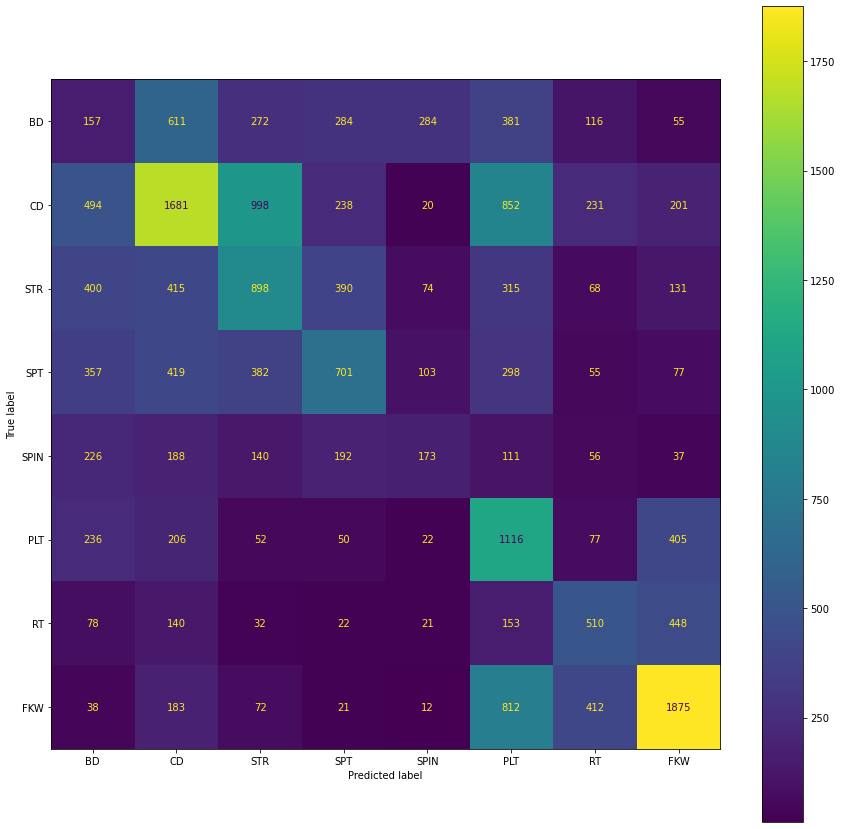

In [11]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


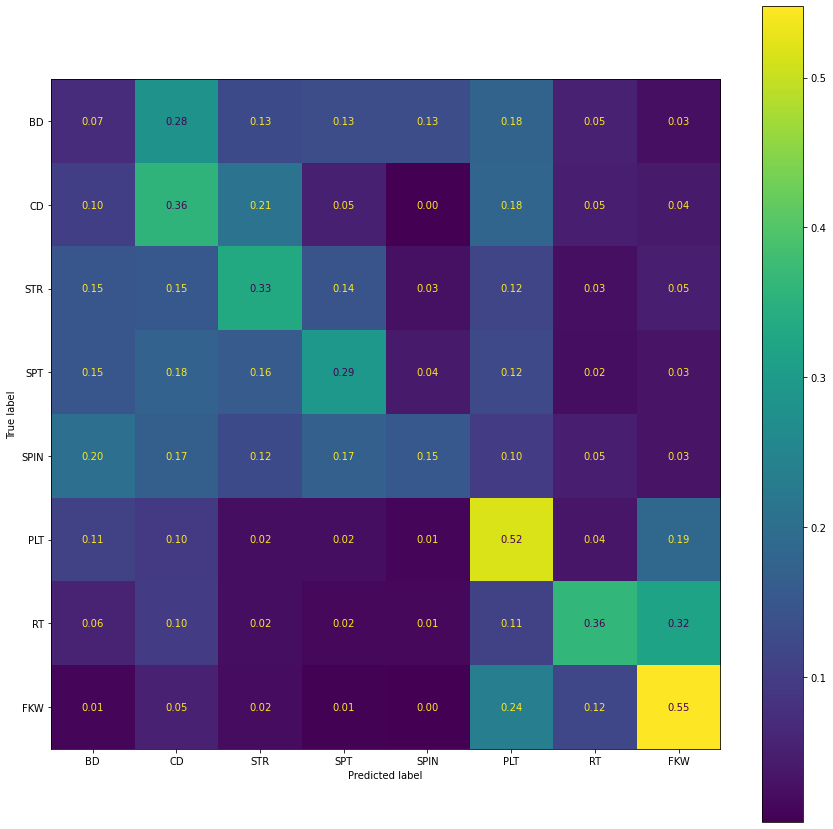

In [12]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

# Enounter split

In [13]:
# enounter: e.g. fold0_test_results.npz, 
encounter_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']
# result_encounter = np.load(os.path.join(result_path, '20210520_104352_encounter'))

# for ii in range(len(encounter_list)):
label_test_all  = []
label_pred_all = []
for ee in encounter_list:
    label_temp = np.load(os.path.join(result_path, '20210520_104352_encounter', ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

In [14]:
print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

          BD      0.470     0.464     0.467      2160
          CD      0.559     0.713     0.627      4715
         STR      0.396     0.420     0.408      2691
         SPT      0.337     0.152     0.210      2392
        SPIN      0.227     0.166     0.191      1123
         PLT      0.553     0.660     0.602      2164
          RT      0.440     0.536     0.484      1404
         FKW      0.686     0.577     0.627      3425

    accuracy                          0.508     20074
   macro avg      0.459     0.461     0.452     20074
weighted avg      0.495     0.508     0.493     20074



## Confusion matrix

In [15]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [16]:
print("Confusion matrix:")
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[1002  218  307  166  209  135   65   58]
 [  64 3364  701  261   73  115   58   79]
 [ 166  802 1130  166  131  146   64   86]
 [ 351 1002  363  364  131  134   23   24]
 [ 255  335  148   76  186   13   84   26]
 [ 150   95  116   29   14 1429   71  260]
 [  69   46   34    7   53   73  753  369]
 [  75  154   54   10   24  541  592 1975]]

[[0.46 0.1  0.14 0.08 0.1  0.06 0.03 0.03]
 [0.01 0.71 0.15 0.06 0.02 0.02 0.01 0.02]
 [0.06 0.3  0.42 0.06 0.05 0.05 0.02 0.03]
 [0.15 0.42 0.15 0.15 0.05 0.06 0.01 0.01]
 [0.23 0.3  0.13 0.07 0.17 0.01 0.07 0.02]
 [0.07 0.04 0.05 0.01 0.01 0.66 0.03 0.12]
 [0.05 0.03 0.02 0.   0.04 0.05 0.54 0.26]
 [0.02 0.04 0.02 0.   0.01 0.16 0.17 0.58]]


In [17]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

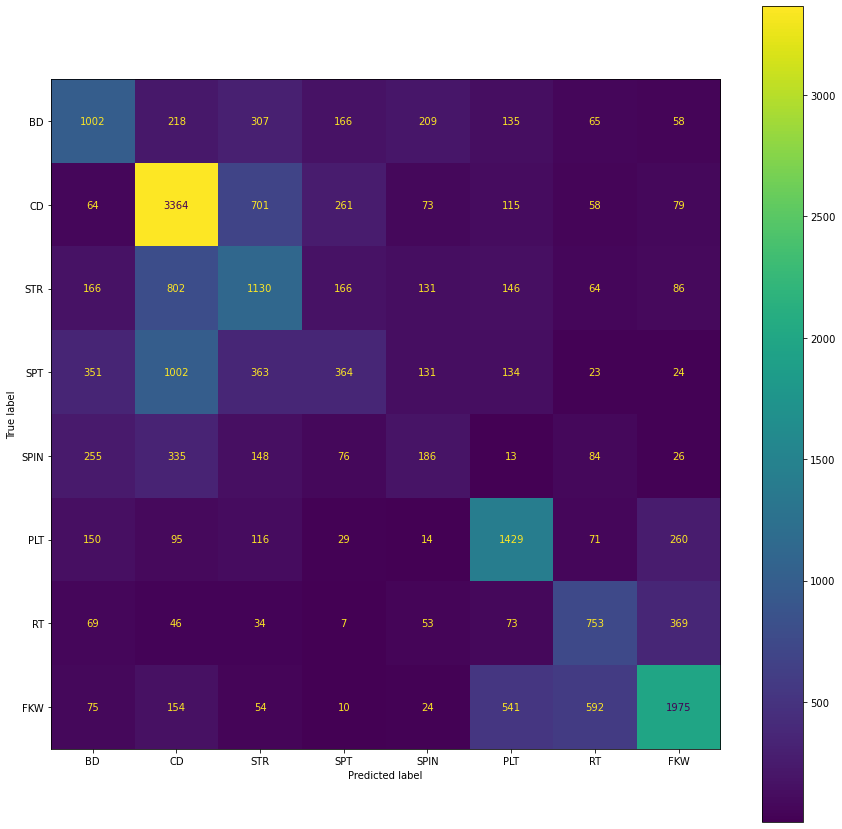

In [18]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


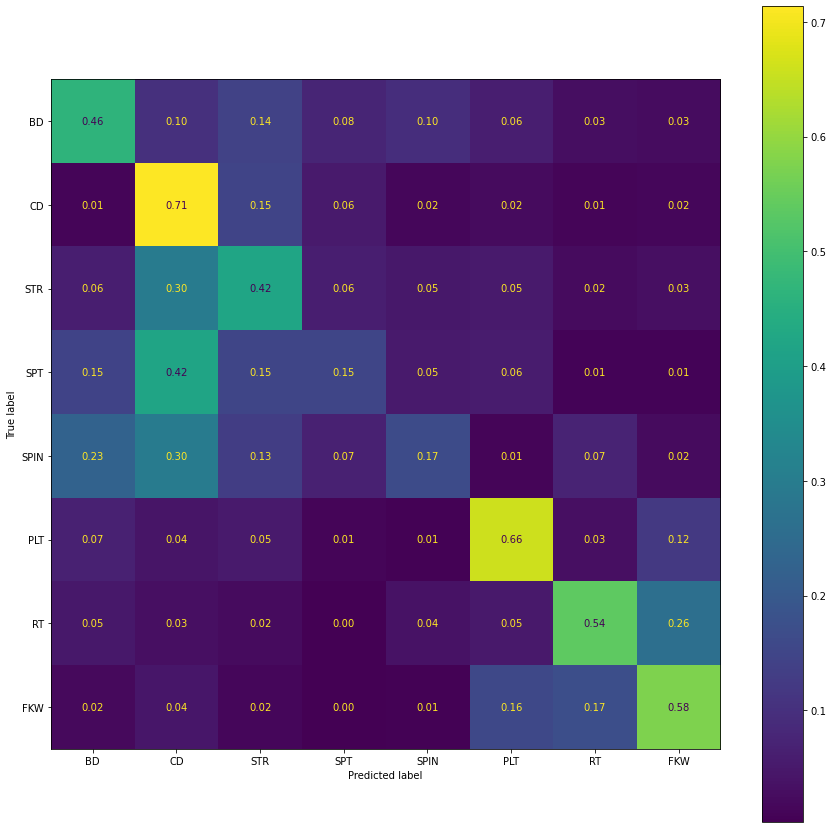

In [19]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

# Clip split

In [20]:
# enounter: e.g. fold0_test_results.npz, 
clip_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']

# for ii in range(len(clip_list)):
label_test_all  = []
label_pred_all = []
for ee in clip_list:
    label_temp = np.load(os.path.join(result_path, '20210523_204759_clip', ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

In [21]:
print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

          BD      0.616     0.575     0.595      2160
          CD      0.660     0.655     0.657      4715
         STR      0.453     0.563     0.502      2691
         SPT      0.587     0.488     0.533      2392
        SPIN      0.427     0.353     0.386      1123
         PLT      0.689     0.694     0.692      2164
          RT      0.604     0.639     0.621      1404
         FKW      0.830     0.837     0.833      3425

    accuracy                          0.631     20074
   macro avg      0.608     0.600     0.602     20074
weighted avg      0.634     0.631     0.631     20074



## Confusion matrix

In [22]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [23]:
print("Confusion matrix:")
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[1242  150  318  142  159   65   51   33]
 [  22 3088  840  474   59   95   87   50]
 [ 117  655 1515  112  105   54   60   73]
 [ 267  315  312 1167  137  139   39   16]
 [ 183  195  184   52  396    7   95   11]
 [ 108  168  110   18   21 1502   51  186]
 [  57   75   25   16   45   71  897  218]
 [  19   34   42    7    5  246  206 2866]]

[[0.57 0.07 0.15 0.07 0.07 0.03 0.02 0.02]
 [0.   0.65 0.18 0.1  0.01 0.02 0.02 0.01]
 [0.04 0.24 0.56 0.04 0.04 0.02 0.02 0.03]
 [0.11 0.13 0.13 0.49 0.06 0.06 0.02 0.01]
 [0.16 0.17 0.16 0.05 0.35 0.01 0.08 0.01]
 [0.05 0.08 0.05 0.01 0.01 0.69 0.02 0.09]
 [0.04 0.05 0.02 0.01 0.03 0.05 0.64 0.16]
 [0.01 0.01 0.01 0.   0.   0.07 0.06 0.84]]


In [24]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

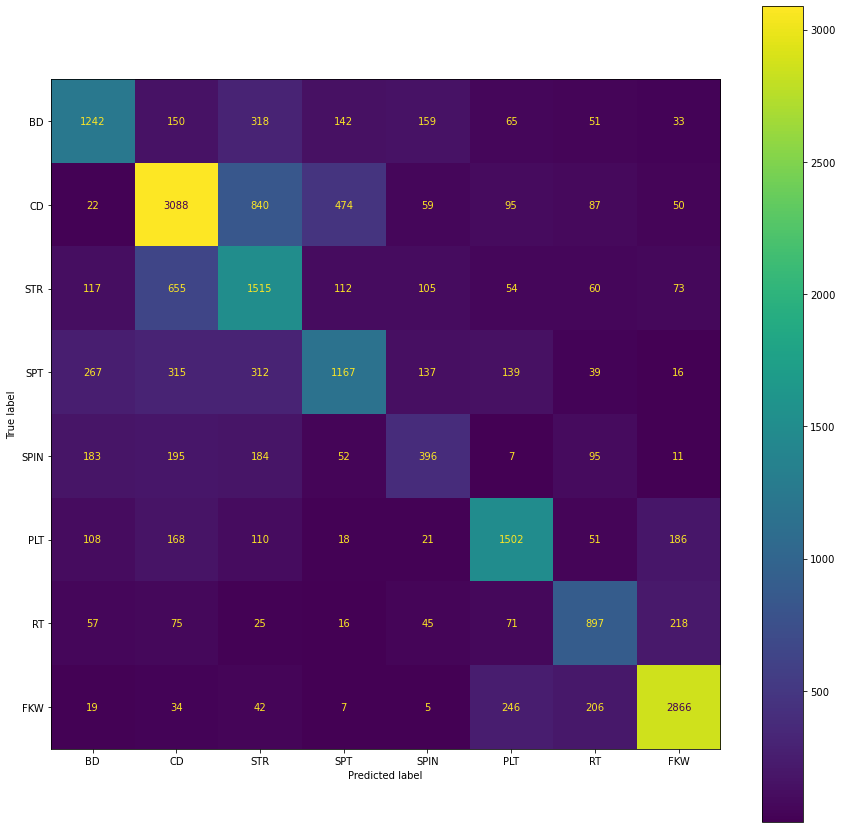

In [25]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


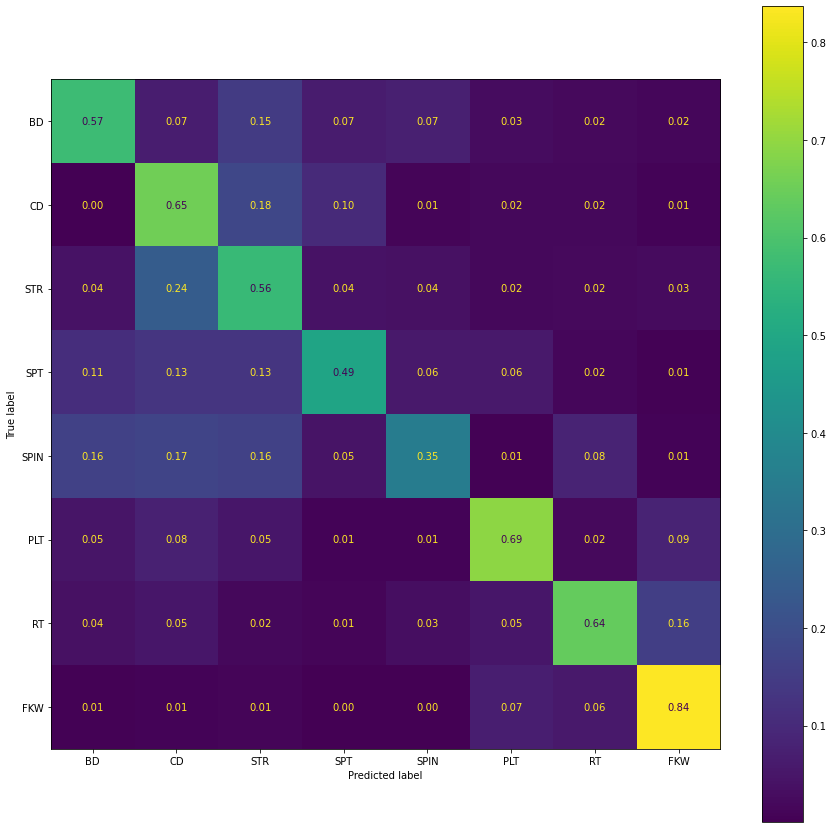

In [26]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)